In [1]:
%matplotlib inline 
import seaborn as sns
import pandas as pd
import gmplot
df = pd.read_csv("datasets/2017_2018_descriptive_set_initial_processed.csv")
df_regions = pd.read_csv("datasets/us_states_regions.csv")

In [2]:
df

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,...,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,wage_diff,regions
0,CERTIFIED,2015-10-06,2017-10-01,H-1B,2015-11-15,2017-11-14,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,15-2041,STATISTICIANS,...,0,0,Y,58032.00,58032.00,N,N,MA,0.00,northeast
1,CERTIFIED,2016-05-13,2017-10-01,H-1B,2016-09-01,2019-08-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),ASSISTANT PROFESSOR,25-1031,"ARCHITECTURE TEACHERS, POSTSECONDARY",...,0,0,Y,60967.00,95600.00,N,N,MA,34633.00,northeast
2,CERTIFIED,2016-11-04,2017-10-01,H-1B,2016-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,19-2012,PHYSICISTS,...,0,0,Y,50398.00,60400.00,N,N,MA,10002.00,northeast
3,CERTIFIED,2016-12-28,2017-10-01,H-1B,2017-02-01,2018-01-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,RESEARCH SCIENTIST,19-2042,"GEOSCIENTISTS, EXCEPT HYDROLOGISTS AND GEOGRAP...",...,0,0,Y,61069.00,65000.00,N,N,MA,3931.00,northeast
4,CERTIFIED,2017-02-24,2017-10-01,H-1B,2017-06-01,2018-05-31,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,POSTDOCTORAL ASSOCIATE,17-2131,MATERIALS ENGINEERS,...,0,0,Y,41392.00,49383.00,N,N,MA,7991.00,northeast
5,CERTIFIED,2017-03-09,2017-10-01,H-1B,2017-09-08,2020-09-08,"PARK VIEW TRAVEL BEVERLY HILLS, LLC",EVENTS AND INCENTIVES COORDINATOR,13-1121,"MEETING, CONVENTION, AND EVENT PLANNERS",...,0,0,Y,45198.00,45200.00,N,N,CA,2.00,west
6,CERTIFIED,2014-10-23,2017-10-02,H-1B,2014-11-01,2017-10-31,"WALTER ASSOCIATES, INCORPORATED",ASSOCIATE,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,1,0,Y,78624.00,88381.32,N,N,MI,9757.32,midwest
7,CERTIFIED,2015-01-07,2017-10-02,H-1B,2015-02-01,2018-01-31,COLUMBIA UNIVERSITY,ASSOCIATE RESEARCH SCIENTIST,19-1029,"BIOLOGICAL SCIENTISTS, ALL OTHER",...,0,0,Y,47247.20,53000.00,N,N,NY,5752.80,northeast
8,CERTIFIED,2015-05-08,2017-10-02,H-1B,2015-10-01,2018-09-30,"CREST ELECTRONICS, INC.",ELECTRICAL DESIGN ENGINEER,17-2071,ELECTRICAL ENGINEERS,...,0,0,Y,60133.00,61347.00,N,N,MN,1214.00,midwest
9,CERTIFIED,2017-09-26,2017-10-02,H-1B,2017-10-10,2020-10-09,"HORIZONSOFTSOLUTIONS, INC",SOFTWARE DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",...,0,0,Y,98176.00,104000.00,Y,N,IL,5824.00,midwest


In [3]:
df_regions

,west,midwest,northeast,south,other
0,WA,ND,PA,OK,AK
1,OR,MN,NY,AR,HI
2,CA,SD,VT,TX,NaN
3,NV,NE,NH,LA,NaN
4,ID,IA,MA,MS,NaN
5,MT,KS,ME,AL,NaN
6,WY,MO,CT,TN,NaN
7,CO,WI,NJ,KY,NaN
8,NM,IL,NaN,WV,NaN
9,UT,IN,NaN,MD,NaN


In [4]:
len(df["WORKSITE_STATE"].unique().tolist())

57

In [5]:
def split_state_to_region(row):
    if(row["WORKSITE_STATE"] in df_regions["west"].values):
        return "west"
    elif(row["WORKSITE_STATE"] in df_regions["midwest"].values):
        return "midwest"
    elif(row["WORKSITE_STATE"] in df_regions["northeast"].values):
        return "northeast"
    elif(row["WORKSITE_STATE"] in df_regions["south"].values):
        return "south"
    else:
        return "other"

In [6]:
df["regions"] = df.apply(lambda row: split_state_to_region(row), axis=1)

In [7]:
df["regions"].value_counts()

south        325141
west         305433
northeast    271461
midwest      192035
other          6777
Name: regions, dtype: int64

column with the region for each row successfully created now error check by seeing which states ended in other and comparing to the number of states which should be in other  there should be 9

In [8]:
df_check = df[df["regions"] == "other"]

In [9]:
len(df_check["WORKSITE_STATE"].unique())

9

In [11]:
df["WORKSITE_STATE"].value_counts()

CA    212488
TX    113896
NY     92705
NJ     73511
IL     55825
WA     44812
MA     44570
PA     41473
GA     39983
FL     38806
MI     36809
VA     31619
NC     30578
OH     27366
MD     18571
MN     18503
AZ     16518
MO     14824
CT     14693
TN     12384
CO     11939
WI     11434
IN     11345
OR      7991
DE      6409
DC      5991
IA      5704
UT      5366
SC      5276
AR      5268
KS      4853
KY      4732
NE      4000
RI      3940
LA      3173
OK      3144
AL      3134
NH      2665
NV      2577
NM      1567
ID      1562
MS      1283
ME      1127
WV       894
HI       887
ND       795
VT       717
PR       653
SD       577
GU       477
MP       422
MT       354
AK       314
WY       259
VI        81
PW         2
FM         1
Name: WORKSITE_STATE, dtype: int64

In [12]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [13]:
text = ""
for key in df["WORKSITE_STATE"]:
    text += key + " , "

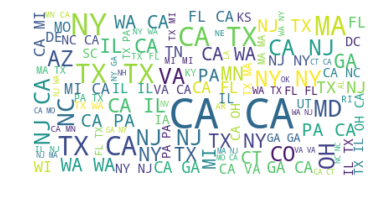

In [14]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
df.to_csv("datasets/2017_2018_descriptive_set_initial_processed.csv", index=False)